# Import the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the data set

In [2]:
df=pd.read_csv(r'D:\data sets\application_data.csv')

# check the structure and data types of data 

In [3]:
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [4]:
df.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [10]:
df.shape

(307511, 122)

# check the null values per columns

In [6]:
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

# # DATA CLEANING BY (HANDLING MISSING VALUES AND OUTLIERS)

 % of null values sorting in decending order

In [11]:
100*(df.isnull().mean()).sort_values(ascending=False)

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

#drop the columns having null vales morethan 40%

In [4]:
cols_to_drop=df.columns[100*df.isnull().mean()>40]
df=df.drop(cols_to_drop,axis=1)

# check the shape after dropping the columns

In [5]:
df.shape

(307511, 73)

# no of columns drop

In [10]:
len(cols_to_drop)

49

# check the null value after dropping the columns in decending order

In [5]:
null_count=df.isnull().sum().sort_values(ascending=False)

# percentage of null value

In [6]:
null_percentage=round(df.isnull().mean()*100,2).sort_values(ascending=False)

In [7]:
df_count=pd.DataFrame(null_count)

In [10]:
df_count.columns=['null_count']

In [8]:
df_percent=pd.DataFrame(null_percentage)
df_percent.columns=['null_percent']
df_null=pd.concat([df_count,df_percent],axis=1)

In [9]:
df_null

,0,null_percent
OCCUPATION_TYPE,96391,31.35
EXT_SOURCE_3,60965,19.83
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.50
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.50
AMT_REQ_CREDIT_BUREAU_MON,41519,13.50
...,...,...
REG_REGION_NOT_LIVE_REGION,0,0.00
REG_REGION_NOT_WORK_REGION,0,0.00
LIVE_REGION_NOT_WORK_REGION,0,0.00
TARGET,0,0.00


In [21]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

# cleaning

As we see this column has '1292' nan values,dropping these null values is not a good idea in the point
of view of analysis, we can categorize these null values in 'missing' category

### replace 'nan' with 'missing'

In [14]:
df['NAME_TYPE_SUITE'].unique()
print(df['NAME_TYPE_SUITE'].isnull().sum())
df['NAME_TYPE_SUITE'].replace(np.nan,'missing',inplace=True)

1292


same procedure we follow with this column also
have '60965' null values

In [15]:
print(df['EXT_SOURCE_3'].isnull().sum())

df['EXT_SOURCE_3'].replace(np.nan,'missing',inplace=True)

60965


In [16]:
df['AMT_REQ_CREDIT_BUREAU_HOUR']=df['AMT_REQ_CREDIT_BUREAU_HOUR'].replace(np.nan,'missing')
df['AMT_REQ_CREDIT_BUREAU_DAY']=df['AMT_REQ_CREDIT_BUREAU_DAY'].replace(np.nan,'missing')
df['AMT_REQ_CREDIT_BUREAU_WEEK']=df['AMT_REQ_CREDIT_BUREAU_WEEK'].replace(np.nan,'missing')
df['AMT_REQ_CREDIT_BUREAU_MON']=df['AMT_REQ_CREDIT_BUREAU_MON'].replace(np.nan,'missing')
df['AMT_REQ_CREDIT_BUREAU_QRT']=df['AMT_REQ_CREDIT_BUREAU_QRT'].replace(np.nan,'missing')
df['AMT_REQ_CREDIT_BUREAU_YEAR']=df['AMT_REQ_CREDIT_BUREAU_YEAR'].replace(np.nan,'missing')

In [17]:
df['OCCUPATION_TYPE'].isnull().sum()
df['OCCUPATION_TYPE'].replace(np.nan,'missing',inplace=True)

###  check missing values after replacing null values

In [72]:
df.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 73, dtype: int64

### data is now clean till now

# Check for the outliers

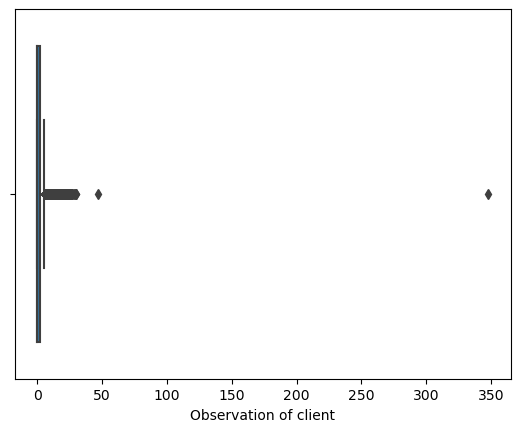

In [19]:
sns.boxplot(x=df['OBS_30_CNT_SOCIAL_CIRCLE'])
plt.xlabel('Observation of client')
plt.show()

In [20]:
df['OBS_30_CNT_SOCIAL_CIRCLE'].describe(percentiles=[0.80,0.82,0.85,0.87,0.90,0.95])

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
50%           0.000000
80%           3.000000
82%           3.000000
85%           3.000000
87%           4.000000
90%           4.000000
95%           6.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

###  as we can see  there is a huge difference between the 95 percentile and the maximum values , this show outliers 

# Remove the outliers

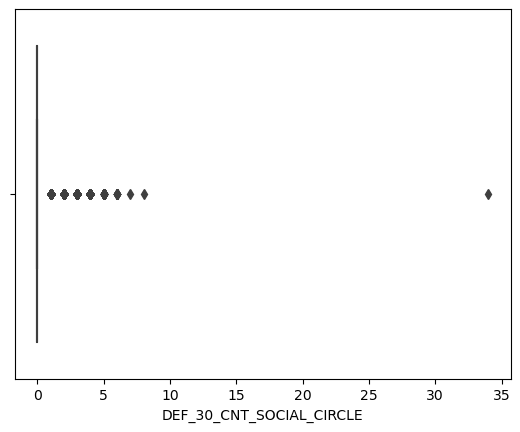

In [21]:
sns.boxplot(x=df['DEF_30_CNT_SOCIAL_CIRCLE'])
plt.show() 
for i in df.index:
    if df.loc[i,'DEF_30_CNT_SOCIAL_CIRCLE']>20.0:
        df.drop(i,inplace=True)

# ANALYSE THE DATA

WHAT type of occupation does the client have shown by countplot

In [35]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,missing,missing,missing,missing,missing,missing
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307510 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307510 non-null  int64  
 1   TARGET                       307510 non-null  int64  
 2   NAME_CONTRACT_TYPE           307510 non-null  object 
 3   CODE_GENDER                  307510 non-null  object 
 4   FLAG_OWN_CAR                 307510 non-null  object 
 5   FLAG_OWN_REALTY              307510 non-null  object 
 6   CNT_CHILDREN                 307510 non-null  int64  
 7   AMT_INCOME_TOTAL             307510 non-null  float64
 8   AMT_CREDIT                   307510 non-null  float64
 9   AMT_ANNUITY                  307498 non-null  float64
 10  AMT_GOODS_PRICE              307232 non-null  float64
 11  NAME_TYPE_SUITE              307510 non-null  object 
 12  NAME_INCOME_TYPE             307510 non-null  object 
 13 

In [24]:
df[["AMT_GOODS_PRICE",'AMT_CREDIT']]

,AMT_GOODS_PRICE,AMT_CREDIT
0,351000.0,406597.5
1,1129500.0,1293502.5
2,135000.0,135000.0
3,297000.0,312682.5
4,513000.0,513000.0
...,...,...
307506,225000.0,254700.0
307507,225000.0,269550.0
307508,585000.0,677664.0
307509,319500.0,370107.0


In [25]:
flag_col=[i for i in df.columns if 'FLAG' in i ]
flag_col

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [26]:
df[flag_col]

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,N,Y,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,N,N,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Y,Y,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,N,Y,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,N,Y,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,N,N,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307507,N,Y,1,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
307508,N,Y,1,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
307509,N,Y,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Making new dataframe which containing all FLAG columns and TARGET column

In [27]:
df_new=df[flag_col+['TARGET']]

In [30]:
df_new

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,Defaulter
1,N,N,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,Repayer
2,Y,Y,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Repayer
3,N,Y,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Repayer
4,N,Y,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Repayer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,N,N,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Repayer
307507,N,Y,1,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,Repayer
307508,N,Y,1,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,Repayer
307509,N,Y,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Defaulter


In [29]:
df_new['TARGET']=df['TARGET'].replace({1:'Defaulter',0:'Repayer'})

C:\Users\Sony\AppData\Local\Temp\ipykernel_2312\3743663784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['TARGET']=df['TARGET'].replace({1:'Defaulter',0:'Repayer'})


In [33]:
for i in df_new:
    
    df_new[i]=df_new[i].replace({1:"Y", 0:"N"})

C:\Users\Sony\AppData\Local\Temp\ipykernel_2312\2748928798.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[i]=df_new[i].replace({1:"Y", 0:"N"})


In [34]:
df_new.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,Y,Y,N,Y,Y,N,N,Y,...,N,N,N,N,N,N,N,N,N,Defaulter
1,N,N,Y,Y,N,Y,Y,N,N,Y,...,N,N,N,N,N,N,N,N,N,Repayer
2,Y,Y,Y,Y,Y,Y,Y,N,N,N,...,N,N,N,N,N,N,N,N,N,Repayer
3,N,Y,Y,Y,N,Y,N,N,N,Y,...,N,N,N,N,N,N,N,N,N,Repayer
4,N,Y,Y,Y,N,Y,N,N,N,N,...,N,N,N,N,N,N,N,N,N,Repayer


<Axes: xlabel='FLAG_OWN_CAR', ylabel='count'>

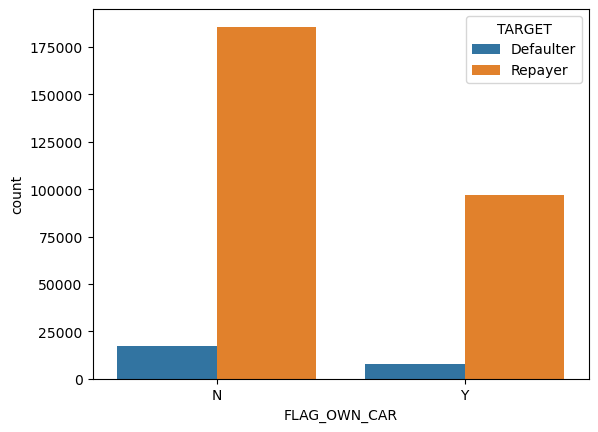

In [36]:
sns.countplot(x='FLAG_OWN_CAR',hue='TARGET',data=df_new)

In [38]:
df.drop(columns=flag_col, axis=1, inplace= True)

In [39]:
df.shape

(307511, 45)

In [40]:
days_col=[i for i in df.columns if 'DAYS' in i]

In [44]:
df[days_col].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,-16036.995067,63815.045904,-4986.120328,-2994.202373,-962.858788
std,4363.988632,141275.766519,3522.886321,1509.450419,826.808487
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000,-4292.000000
25%,-19682.000000,-2760.000000,-7479.500000,-4299.000000,-1570.000000
50%,-15750.000000,-1213.000000,-4504.000000,-3254.000000,-757.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000,-274.000000
max,-7489.000000,365243.000000,0.000000,0.000000,0.000000


### As seen that there are lot of negative values

By using Abs function Convert negative values to positive

In [46]:
df[days_col]=abs(df[days_col])

In [47]:
df[days_col].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,16036.995067,67724.742149,4986.120328,2994.202373,962.858788
std,4363.988632,139443.751806,3522.886321,1509.450419,826.808487
min,7489.000000,0.000000,0.000000,0.000000,0.000000
25%,12413.000000,933.000000,2010.000000,1720.000000,274.000000
50%,15750.000000,2219.000000,4504.000000,3254.000000,757.000000
75%,19682.000000,5707.000000,7479.500000,4299.000000,1570.000000
max,25229.000000,365243.000000,24672.000000,7197.000000,4292.000000


## Standardizing values

In [48]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,306490.000000,306490.000000,306490.000000,307510.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,16036.995067,67724.742149,...,0.143421,1.405292,0.100049,962.858788,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,139443.751806,...,0.446698,2.379803,0.362291,826.808487,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,...,0.000000,0.000000,0.000000,274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,...,0.000000,0.000000,0.000000,757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,5707.000000,...,0.000000,2.000000,0.000000,1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,...,34.000000,344.000000,24.000000,4292.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### columns AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE have very high values, thus will make these numerical columns in categorical columns for better understanding.
Making the Bins of Numerical Columns to create a categorical column
Making bins for income amount in Lacs

In [50]:
df['AMT_INCOME_TOTAL']=df['AMT_INCOME_TOTAL']/100000
df['AMT_INCOME_TOTAL']

0         2.025
1         2.700
2         0.675
3         1.350
4         1.215
          ...  
307506    1.575
307507    0.720
307508    1.530
307509    1.710
307510    1.575
Name: AMT_INCOME_TOTAL, Length: 307511, dtype: float64

In [56]:
df['AMT_GOODS_PRICE']=df['AMT_GOODS_PRICE']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

df['AMT_GOODS_PRICE_RANGE']=pd.cut(df['AMT_GOODS_PRICE'],bins=bins,labels=slots)

In [57]:
round((df["AMT_GOODS_PRICE_RANGE"].value_counts(normalize = True)*100),2)

0-1L         100.0
1L-2L          0.0
2L-3L          0.0
3L-4L          0.0
4L-5L          0.0
5L-6L          0.0
6L-7L          0.0
7L-8L          0.0
8L-9L          0.0
9L-10L         0.0
10L Above      0.0
Name: AMT_GOODS_PRICE_RANGE, dtype: float64

In [64]:
df['AMT_CREDIT_in_lakhs_Range'] = pd.cut(df['AMT_CREDIT_in_lakhs'],bins = [0,5,10,15,20,25,30,35,40,45], labels = ['0-5L','5-10L','10-15L','15-20L','20-25L','25-30L','30-35L','35-40L','Above 40L'])

In [63]:
df['AMT_CREDIT_in_lakhs'] = round(df['AMT_CREDIT']/100000,2)

### Convert DAYS_BIRTH, DAYS_EMPLOYED columns in terms of Years and binning

In [67]:
df["AGE"] = df["DAYS_BIRTH"]/365
bins = [0,20,25,30,35,40,45,50,55,60,100]
slots = ["0-20","20-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60","60 Above"]

df["AGE_GROUP"] = pd.cut(df["AGE"], bins=bins, labels=slots)

In [68]:
df["AGE_GROUP"].value_counts(normalize= True)*100

35-40       13.940314
40-45       13.464884
30-35       12.825557
60 Above    11.569993
45-50       11.425608
50-55       11.362846
55-60       10.770346
25-30       10.686447
20-25        3.954005
0-20         0.000000
Name: AGE_GROUP, dtype: float64

### DAYS_EMPLOYED
creating column "EMPLOYEMENT_YEARS" from "DAYS_EMPLOYED"

In [69]:
df["YEARS_EMPLOYED"] = df["DAYS_EMPLOYED"]/365
bins = [0,5,10,15,20,25,30,50]
slots = ["0-5","5-10","10-15","15-20","20-25","25-30","30 Above"]

df["EMPLOYEMENT_YEARS"] = pd.cut(df["YEARS_EMPLOYED"], bins=bins, labels=slots)

In [70]:
df["EMPLOYEMENT_YEARS"].value_counts(normalize= True)*100

0-5         54.061911
5-10        25.729074
10-15       10.926289
15-20        4.302854
20-25        2.476054
25-30        1.311996
30 Above     1.191822
Name: EMPLOYEMENT_YEARS, dtype: float64

### Converting Days to Years

In [71]:
df[["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", 
                "DAYS_LAST_PHONE_CHANGE"]] = abs(df[["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", 
                                                                 "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"]])

In [72]:
df[["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"]].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,16036.995067,67724.742149,4986.120328,2994.202373,962.858788
std,4363.988632,139443.751806,3522.886321,1509.450419,826.808487
min,7489.000000,0.000000,0.000000,0.000000,0.000000
25%,12413.000000,933.000000,2010.000000,1720.000000,274.000000
50%,15750.000000,2219.000000,4504.000000,3254.000000,757.000000
75%,19682.000000,5707.000000,7479.500000,4299.000000,1570.000000
max,25229.000000,365243.000000,24672.000000,7197.000000,4292.000000


In [73]:
df['AGE_IN_YEARS'] = round(df['DAYS_BIRTH']/365,2)

In [74]:
df['AGE_IN_YEARS']

0         25.92
1         45.93
2         52.18
3         52.07
4         54.61
          ...  
307506    25.55
307507    56.92
307508    41.00
307509    32.77
307510    46.18
Name: AGE_IN_YEARS, Length: 307511, dtype: float64

In [75]:
bins=[0,20,25,30,35,40,45,50,55,60,65,70]
slot=["0-20",'20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65','above 65']
df['AGE_IN_YEARS_RANGE']=pd.cut(df['AGE_IN_YEARS'],bins,labels=slot)

In [76]:
df[['AGE_IN_YEARS_RANGE','AGE_IN_YEARS']]

,AGE_IN_YEARS_RANGE,AGE_IN_YEARS
0,25-30,25.92
1,45-50,45.93
2,50-55,52.18
3,50-55,52.07
4,50-55,54.61
...,...,...
307506,25-30,25.55
307507,55-60,56.92
307508,40-45,41.00
307509,30-35,32.77


### Making a categorical features list

In [77]:
categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY','CNT_CHILDREN','CNT_FAM_MEMBERS']

### categorical columns:NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR ,FLAG_OWN_REALTY,ORGANIZATION_TYPE
###numerical variable: SK_ID_CURR, AMT_INCOME_TOTAL,  

## Categorical Unordered Univariate Analysis

In [32]:
education=df['NAME_EDUCATION_TYPE'].value_counts()

In [33]:
df['NAME_EDUCATION_TYPE']=df['NAME_EDUCATION_TYPE'].replace({'Secondary / secondary special':'secondary'})

<Axes: >

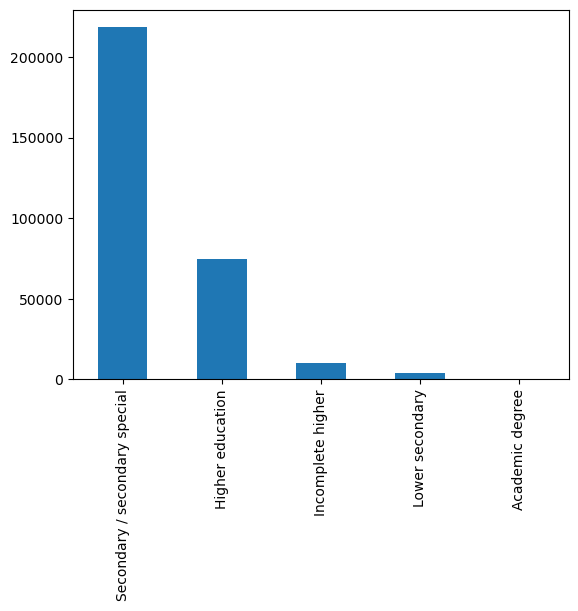

In [34]:
education.plot(kind='bar')

In [35]:
df['CODE_GENDER']=df['CODE_GENDER'].replace({'F':'Female','M':'Male','XNA':'not_defined'})

<Axes: >

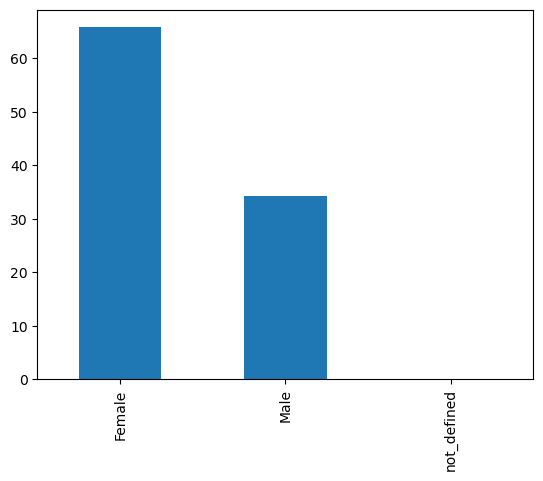

In [36]:
(df['CODE_GENDER'].value_counts(normalize=True)*100).plot.bar()

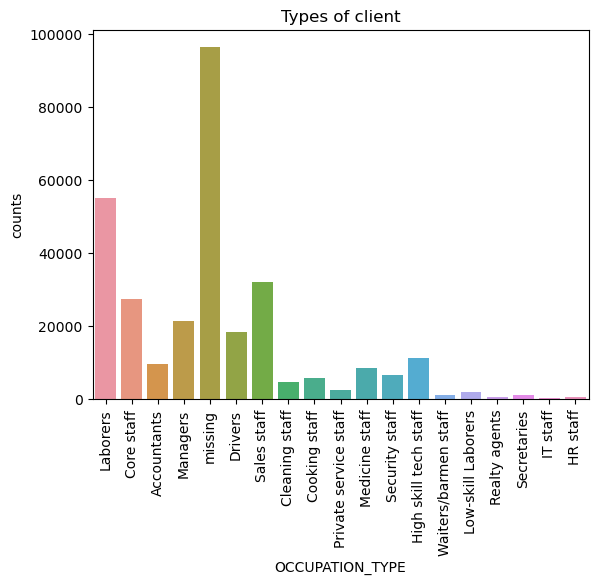

In [37]:
sns.countplot(df,x='OCCUPATION_TYPE')
plt.xticks(rotation=90)
plt.ylabel('counts')
plt.title('Types of client')
plt.show()

In [38]:
df['OCCUPATION_TYPE'].value_counts(normalize=True)*100

missing                  31.345647
Laborers                 17.946083
Sales staff              10.439335
Core staff                8.965237
Managers                  6.949693
Drivers                   6.049559
High skill tech staff     3.700693
Accountants               3.191116
Medicine staff            2.776170
Security staff            2.185620
Cooking staff             1.933596
Cleaning staff            1.513122
Private service staff     0.862411
Low-skill Laborers        0.680628
Waiters/barmen staff      0.438360
Secretaries               0.424376
Realty agents             0.244220
HR staff                  0.183083
IT staff                  0.171051
Name: OCCUPATION_TYPE, dtype: float64

In [46]:
df['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29278
Name: NAME_CONTRACT_TYPE, dtype: int64

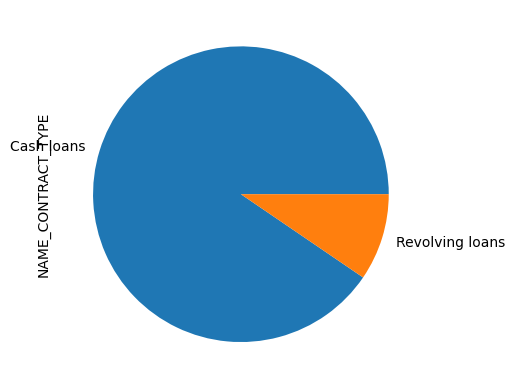

In [48]:
df['NAME_CONTRACT_TYPE'].value_counts().plot.pie()
plt.show()

# numerical variable

In [73]:
df[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,-9461,-637,-3648.0,-2120,-1134.0
1,-16765,-1188,-1186.0,-291,-828.0
2,-19046,-225,-4260.0,-2531,-815.0
3,-19005,-3039,-9833.0,-2437,-617.0
4,-19932,-3038,-4311.0,-3458,-1106.0
...,...,...,...,...,...
307506,-9327,-236,-8456.0,-1982,-273.0
307507,-20775,365243,-4388.0,-4090,0.0
307508,-14966,-7921,-6737.0,-5150,-1909.0
307509,-11961,-4786,-2562.0,-931,-322.0


If you see the data carefully, you will find that though these are days, it contains negative values which is not valid. So let’s make changes accordingly.### 

In [75]:
day_cols = [i for i in df if i.startswith('DAYS')]
day_cols


['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [76]:
df[day_cols]= abs(df[day_cols])

In [77]:
df[day_cols]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,9461,637,3648.0,2120,1134.0
1,16765,1188,1186.0,291,828.0
2,19046,225,4260.0,2531,815.0
3,19005,3039,9833.0,2437,617.0
4,19932,3038,4311.0,3458,1106.0
...,...,...,...,...,...
307506,9327,236,8456.0,1982,273.0
307507,20775,365243,4388.0,4090,0.0
307508,14966,7921,6737.0,5150,1909.0
307509,11961,4786,2562.0,931,322.0


In [85]:
df[['ORGANIZATION_TYPE','NAME_INCOME_TYPE','OCCUPATION_TYPE']].head(30)

,ORGANIZATION_TYPE,NAME_INCOME_TYPE,OCCUPATION_TYPE
0,Business Entity Type 3,Working,Laborers
1,School,State servant,Core staff
2,Government,Working,Laborers
3,Business Entity Type 3,Working,Laborers
4,Religion,Working,Core staff
5,Other,State servant,Laborers
6,Business Entity Type 3,Commercial associate,Accountants
7,Other,State servant,Managers
8,Pensioner,Pensioner,Pensioner
9,Electricity,Working,Laborers


### we observe that wherever NAME_INCOME_TYPE is Pensioner there only we have null values in ORGANIZATON_TYPE column.

In [80]:
df.NAME_INCOME_TYPE.value_counts(normalize=True)*100 

Working                 51.632142
Commercial associate    23.289324
Pensioner               18.003317
State servant            7.057331
Unemployed               0.007154
Student                  0.005853
Businessman              0.003252
Maternity leave          0.001626
Name: NAME_INCOME_TYPE, dtype: float64

In [82]:
df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].replace('XNA', 'Pensioner')

In [84]:
df['OCCUPATION_TYPE'].replace('missing','Pensioner' , inplace = True)

### 3Let’s Bin ‘DAYS_BIRTH’ column by converting it to years based on various “AGE_GROUP”

In [88]:
df['DAYS_BIRTH']

0          9461
1         16765
2         19046
3         19005
4         19932
          ...  
307506     9327
307507    20775
307508    14966
307509    11961
307510    16856
Name: DAYS_BIRTH, Length: 307510, dtype: int64

In [92]:
df['DAYS_BIRTH']= (df['DAYS_BIRTH']/365).astype(int)    # Converting 
df['DAYS_BIRTH'].unique()
df['AGE_GROUP']=pd.cut(df['DAYS_BIRTH'],                 
                         bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])   #Binning
df[['DAYS_BIRTH','AGE_GROUP']].head()

,DAYS_BIRTH,AGE_GROUP
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307510 entries, 0 to 307510
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307510 non-null  int64   
 1   TARGET                       307510 non-null  object  
 2   NAME_CONTRACT_TYPE           307510 non-null  object  
 3   CODE_GENDER                  307510 non-null  object  
 4   FLAG_OWN_CAR                 307510 non-null  object  
 5   FLAG_OWN_REALTY              307510 non-null  object  
 6   CNT_CHILDREN                 307510 non-null  int64   
 7   AMT_INCOME_TOTAL             307510 non-null  float64 
 8   AMT_CREDIT                   307510 non-null  float64 
 9   AMT_ANNUITY                  307498 non-null  float64 
 10  AMT_GOODS_PRICE              307232 non-null  float64 
 11  NAME_TYPE_SUITE              307510 non-null  object  
 12  NAME_INCOME_TYPE             307510 non-null

In [94]:
df['NAME_CONTRACT_TYPE'] = df['NAME_CONTRACT_TYPE'].astype('category')
df['CODE_GENDER'] = df['CODE_GENDER'].astype('category')
df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].astype('category')
df['NAME_INCOME_TYPE'] = df['NAME_INCOME_TYPE'].astype('category')
df['NAME_EDUCATION_TYPE'] = df['NAME_EDUCATION_TYPE'].astype('category')
df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].astype('category')
df['NAME_HOUSING_TYPE'] = df['NAME_HOUSING_TYPE'].astype('category')
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].astype('category')
df['WEEKDAY_APPR_PROCESS_START'] = df['WEEKDAY_APPR_PROCESS_START'].astype('category')
df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].astype('category')

### drop the unwanted columns

In [95]:
unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df.drop(labels=unwanted,axis=1,inplace=True)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307510 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307510 non-null  int64   
 1   TARGET                       307510 non-null  object  
 2   NAME_CONTRACT_TYPE           307510 non-null  category
 3   CODE_GENDER                  307510 non-null  category
 4   FLAG_OWN_CAR                 307510 non-null  object  
 5   FLAG_OWN_REALTY              307510 non-null  object  
 6   CNT_CHILDREN                 307510 non-null  int64   
 7   AMT_INCOME_TOTAL             307510 non-null  float64 
 8   AMT_CREDIT                   307510 non-null  float64 
 9   AMT_ANNUITY                  307498 non-null  float64 
 10  AMT_GOODS_PRICE              307232 non-null  float64 
 11  NAME_TYPE_SUITE              307510 non-null  category
 12  NAME_INCOME_TYPE             307510 non-null

## categorical vs numerical analyses

In [39]:
df['TARGET']=df['TARGET'].replace({0:'Good_client',1:'Bad_client'})

Text(0.5, 1.0, 'Gender Distribution')

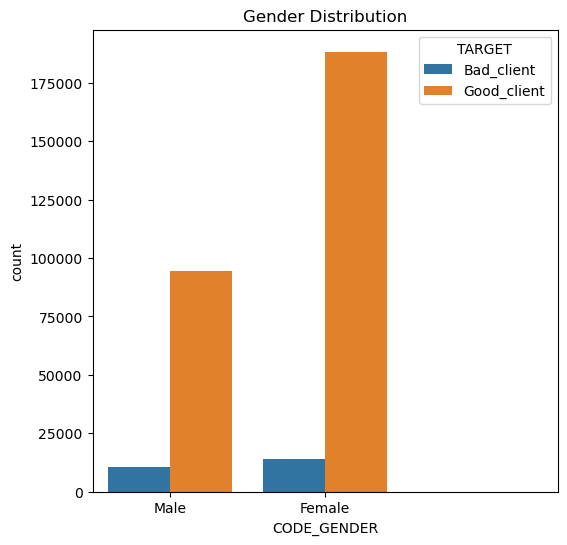

In [34]:

plt.figure(figsize=(6,6))
sns.countplot(df,x='CODE_GENDER',hue='TARGET')
plt.xticks([0,1], labels=["Male", "Female"])

plt.title("Gender Distribution")

### let’s check the data imbalance

In [99]:
Target0 = df.loc[df["TARGET"]=='Good_client'] 
Target1 = df.loc[df["TARGET"]=='Bad_client']
round(len(Target0)/len(Target1),2)

11.39

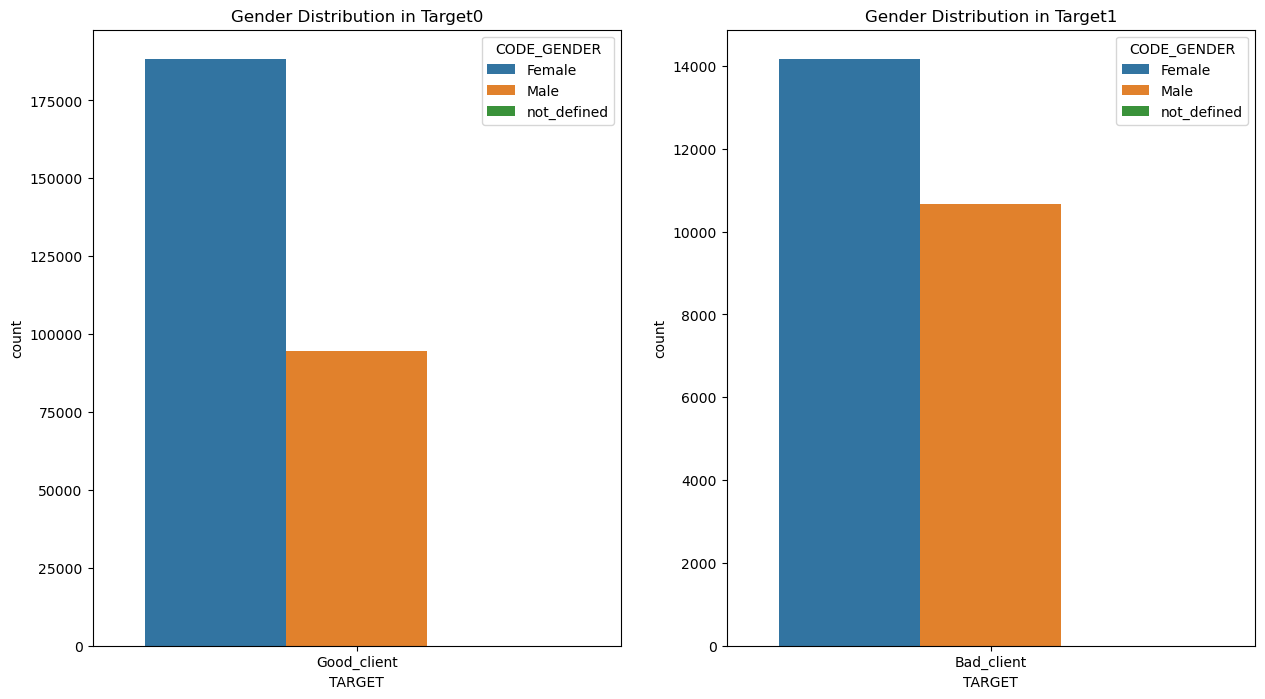

In [100]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target0)
plt.title("Gender Distribution in Target0")
plt.subplot(1,2,2)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target1)
plt.title("Gender Distribution in Target1")

plt.show()

### It seems like Female clients applied higher than male clients for loan

#  BIVARIATE ANALYSIS

Text(0, 0.5, 'Loan annuity')

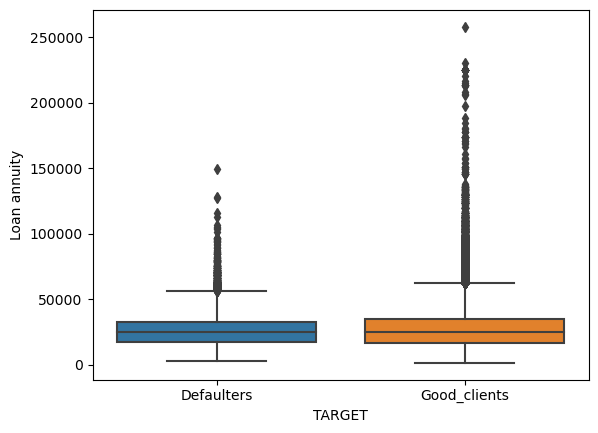

In [75]:
sns.boxplot(x=df["TARGET"],y=df['AMT_ANNUITY'])
plt.ylabel('Loan annuity')

# load second data set having previous client information

In [79]:
df1=pd.read_csv(r'D:\data sets\previous_application (1).csv')
df1

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [80]:
df1.shape

(1670214, 37)

In [81]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [82]:
df1.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [83]:
df1.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [84]:
def miss_col(df1):
    return round((df1.isnull().mean()*100).sort_values(ascending=False),2)

In [85]:
miss_col(df1)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
AMT_DOWN_PAYMENT               53.64
RATE_DOWN_PAYMENT              53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_TERMINATION               40.30
DAYS_LAST_DUE                  40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_FIRST_DUE                 40.30
DAYS_FIRST_DRAWING             40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
AMT_CREDIT                      0.00
NAME_YIELD_GROUP                0.00
NAME_PORTFOLIO                  0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
SK_ID_PREV                      0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
D

### Checking the features has missing value more than 50%

In [88]:
missing=miss_col(df1)[(miss_col(df1)>50)]

In [89]:
missing

RATE_INTEREST_PRIVILEGED    99.64
RATE_INTEREST_PRIMARY       99.64
AMT_DOWN_PAYMENT            53.64
RATE_DOWN_PAYMENT           53.64
dtype: float64

In [90]:
df1.drop(columns=missing.index,inplace=True)

In [91]:
df1.shape

(1670214, 33)

In [93]:
missing_values15 = miss_col(df1)[miss_col(df1)>15]

In [94]:
missing_values15

NAME_TYPE_SUITE              49.12
DAYS_FIRST_DRAWING           40.30
DAYS_TERMINATION             40.30
DAYS_LAST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_FIRST_DUE               40.30
NFLAG_INSURED_ON_APPROVAL    40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
dtype: float64

In [95]:
notuse = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

df1.drop(notuse,axis =1, inplace = True)

df1.shape

(1670214, 29)

In [24]:
df3=df1[['SK_ID_CURR']].drop_duplicates()
df3['flag']='prev_client'
df3

,SK_ID_CURR,flag
0,271877,prev_client
1,108129,prev_client
2,122040,prev_client
3,176158,prev_client
4,202054,prev_client
...,...,...
1669619,239799,prev_client
1669655,174832,prev_client
1669726,253940,prev_client
1669862,353284,prev_client


# create a new_dataframe named 'df_new' by merging two data frame

In [25]:
df_new=df.merge(df3,on='SK_ID_CURR',how='left')
df_new

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,flag
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,prev_client
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,prev_client
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,prev_client
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,missing,missing,missing,missing,missing,missing,prev_client
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,prev_client
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307505,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,missing,missing,missing,missing,missing,missing,prev_client
307506,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,missing,missing,missing,missing,missing,missing,prev_client
307507,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0,prev_client
307508,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,prev_client


In [26]:
df_new['flag']=df_new['flag'].replace(np.nan,'new_client')
df_new['flag'].unique()

array(['prev_client', 'new_client'], dtype=object)

In [27]:
freq_flag=round(100*(df_new['flag'].value_counts())/len(df_new.index),2)
freq_flag

prev_client    94.65
new_client      5.35
Name: flag, dtype: float64

<Axes: >

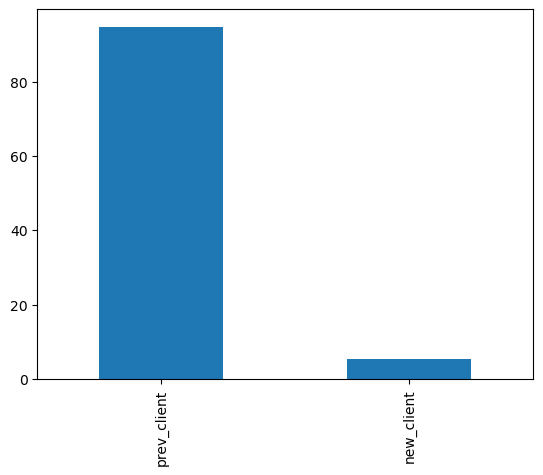

In [28]:
freq_flag.plot(kind='bar')

# temp0 shows how many good_clients are there  in df

In [43]:
temp0=df[df["TARGET"]=='Good_client']

In [44]:
temp0

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,Good_client,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,Good_client,Revolving loans,Male,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,Good_client,Cash loans,Female,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,missing,missing,missing,missing,missing,missing
4,100007,Good_client,Cash loans,Male,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,Good_client,Cash loans,Male,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307505,456249,Good_client,Cash loans,Female,N,Y,0,112500.0,225000.0,22050.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307506,456251,Good_client,Cash loans,Male,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,missing,missing,missing,missing,missing,missing
307507,456252,Good_client,Cash loans,Female,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,missing,missing,missing,missing,missing,missing
307508,456253,Good_client,Cash loans,Female,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0


In [45]:
temp1=df[df["TARGET"]=='Bad_client']

# temp1 shows how many defaulters are there in df

In [46]:
temp1['TARGET'].value_counts()

Bad_client    24825
Name: TARGET, dtype: int64

# Defalters having income less than 20000

In [47]:
defalter=temp1[temp1['AMT_ANNUITY']<20000]
defalter['TARGET'].value_counts()

Bad_client    8084
Name: TARGET, dtype: int64

In [48]:
defa=temp1[temp1['AMT_ANNUITY']<10000]
defa['TARGET'].value_counts()

Bad_client    1650
Name: TARGET, dtype: int64

# Male Defalters and female dafalters

In [49]:
defa_male=temp1[temp1['CODE_GENDER']=='Male']

In [83]:
defa_male

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,freq_target
0,100002,Defaulters,Cash loans,Male,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
40,100047,Defaulters,Cash loans,Male,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0,NaN
94,100112,Defaulters,Cash loans,Male,Y,Y,0,315000.0,953460.0,64107.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,NaN
138,100160,Defaulters,Cash loans,Male,N,Y,0,292500.0,675000.0,36747.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
180,100209,Defaulters,Revolving loans,Male,N,Y,3,180000.0,540000.0,27000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307433,456171,Defaulters,Cash loans,Male,N,Y,0,50400.0,113760.0,7731.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0,NaN
307438,456176,Defaulters,Cash loans,Male,N,Y,0,171000.0,1436850.0,42142.5,...,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0,NaN
307446,456184,Defaulters,Cash loans,Male,N,N,0,270000.0,900000.0,40671.0,...,0,0,0,missing,missing,missing,missing,missing,missing,NaN
307448,456186,Defaulters,Cash loans,Male,N,N,1,207000.0,450000.0,32746.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,NaN


In [84]:
defa_male['CODE_GENDER'].value_counts()

Male    10655
Name: CODE_GENDER, dtype: int64

# Check for duplicacy

In [85]:
df['duplicated']=df.duplicated(subset=['SK_ID_CURR'])

In [86]:
df['duplicated']

0         False
1         False
2         False
3         False
4         False
          ...  
307506    False
307507    False
307508    False
307509    False
307510    False
Name: duplicated, Length: 307510, dtype: bool

# this graph represent the Bad_client w.r.t amt_annuity

<Axes: xlabel='AMT_ANNUITY', ylabel='Count'>

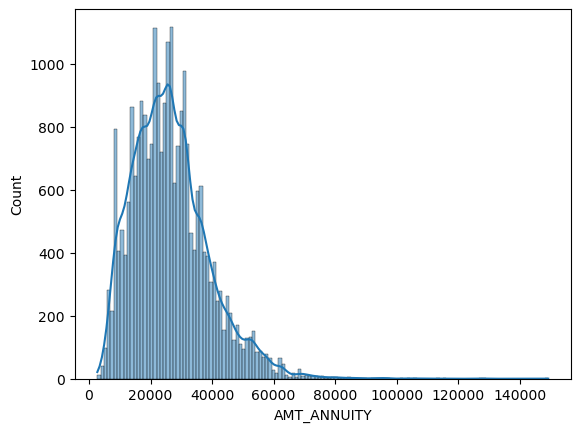

In [50]:
sns.histplot(data=temp1["AMT_ANNUITY"],kde=True)

# this graph represent the good client w.r.t 'amt_annuity

<Axes: xlabel='AMT_ANNUITY', ylabel='Count'>

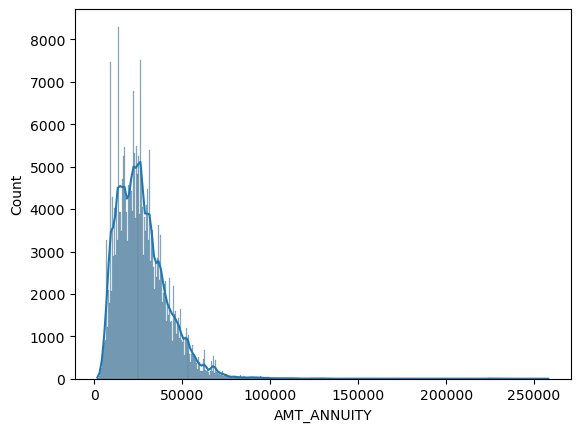

In [89]:
sns.histplot(data=temp0["AMT_ANNUITY"],kde=True)

# Multivariate Analysis

# this graph shows the relationship b/w multiple variable 
# it shows whether they have positive relation and negative relation

C:\Users\Sony\AppData\Local\Temp\ipykernel_11660\2159034145.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[["AMT_ANNUITY","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_GOODS_PRICE","TARGET"]].corr(),annot=True)


<Axes: >

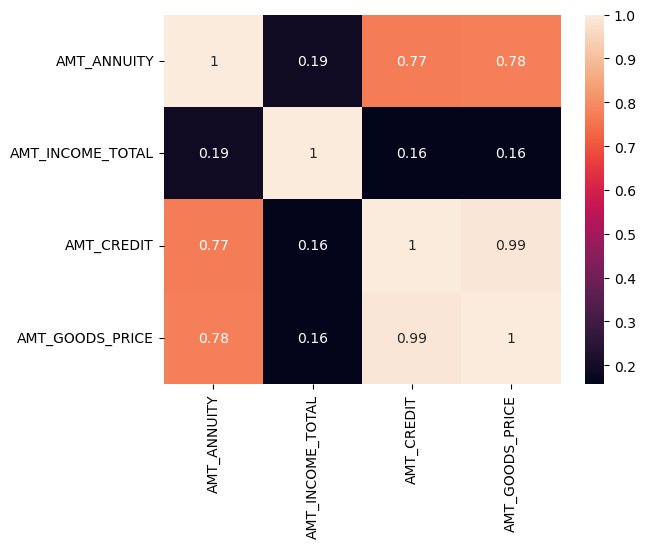

In [92]:
sns.heatmap(df[["AMT_ANNUITY","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_GOODS_PRICE","TARGET"]].corr(),annot=True)

# Load Second data set i.e previous application

In [51]:
(((df1.isnull().sum())/len(df1.index))*100).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

# Drop the columns having more then 40 % null values 

In [52]:
cols_to_drop=df1.columns[100*df1.isnull().mean()>40]
df1=df1.drop(cols_to_drop,axis=1)

# Shape of data frame after removing the  columns

In [53]:
df1.shape

(1670214, 26)

# Analyse the data

In [54]:
df1['NAME_CONTRACT_STATUS'].unique()

array(['Approved', 'Refused', 'Canceled', 'Unused offer'], dtype=object)

In [58]:
round(df1['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100,2)

Approved        62.07
Canceled        18.94
Refused         17.40
Unused offer     1.58
Name: NAME_CONTRACT_STATUS, dtype: float64

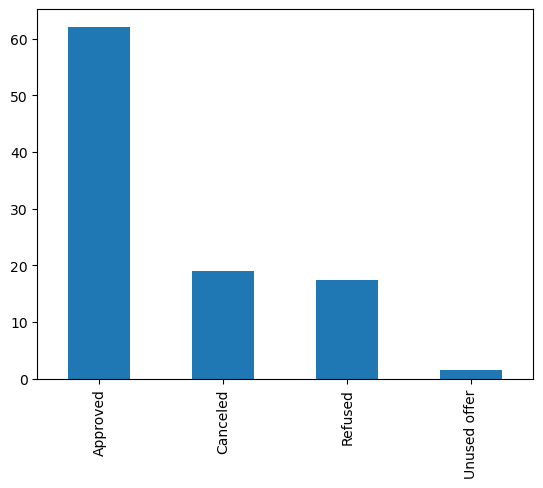

In [59]:
round(df1['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100,2).plot(kind='bar')
plt.xlabel='client_status'
plt.ylabel='percentage'

In [50]:
df1['FLAG_LAST_APPL_PER_CONTRACT'].unique()

array(['Y', 'N'], dtype=object)

In [51]:
df1['FLAG_LAST_APPL_PER_CONTRACT'].replace('Y','YES',inplace=True)
df1['FLAG_LAST_APPL_PER_CONTRACT'].replace('N','NO',inplace=True)


In [52]:
df1['FLAG_LAST_APPL_PER_CONTRACT'].unique()

array(['YES', 'NO'], dtype=object)

In [53]:
df1['NAME_CLIENT_TYPE'].unique()

array(['Repeater', 'New', 'Refreshed', 'XNA'], dtype=object)

<Axes: xlabel='NAME_CLIENT_TYPE', ylabel='count'>

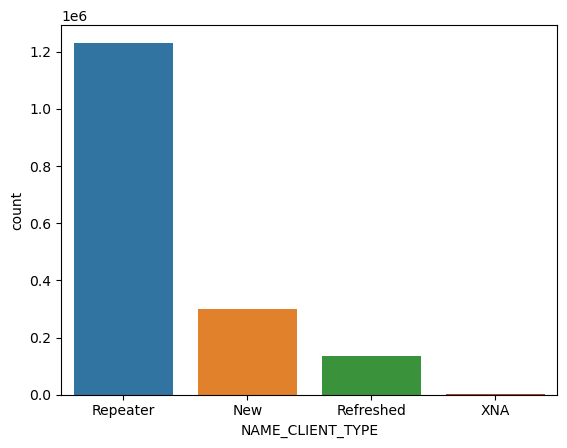

In [54]:
sns.countplot(df1,x='NAME_CLIENT_TYPE')

# variable 'a' store the details of new clients with 'amt_annuity'<1000

In [60]:
a=df1[(df1['AMT_ANNUITY']<1000) & (df1['NAME_CLIENT_TYPE']=='New')]

In [61]:
a['NAME_CONTRACT_STATUS'].value_counts()

Approved    324
Refused       6
Name: NAME_CONTRACT_STATUS, dtype: int64

In [62]:
approved=df1[df1['NAME_CONTRACT_STATUS']=='Approved']

In [63]:
approved

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,315000.0,SATURDAY,8,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,267295.5,WEDNESDAY,12,Y,...,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,87750.0,TUESDAY,15,Y,...,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,105237.0,MONDAY,12,Y,...,Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,180000.0,WEDNESDAY,9,Y,...,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low


In [60]:
refused=df1[df1['NAME_CONTRACT_STATUS']=='Refused']

In [61]:
canceled=df1[df1['NAME_CONTRACT_STATUS']=='Canceled']

# Group by 

In [64]:
result = df1.groupby('NAME_CONTRACT_STATUS')

In [65]:
result.first()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
NAME_CONTRACT_STATUS,,,,,,,,,,,,,,,,,,,,,
Approved,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,YES,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
Canceled,2315218,175704,Cash loans,44673.390,0.0,0.0,540396.0,TUESDAY,11,YES,...,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,18.0,XNA,Cash
Refused,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,YES,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high
Unused offer,1366380,247572,Consumer loans,13692.105,17950.5,17950.5,17950.5,MONDAY,19,YES,...,Repeater,Mobile,XNA,XNA,Country-wide,25,Connectivity,10.0,XNA,POS mobile with interest
